# THE Winter School: Lecture 1

**Author:**
[Anthony Strittmatter](http://www.anthonystrittmatter.com)


We have acces to web-scraped data from the online auction platform *MyLemons* and estimate the hedonic prices of used-cars. We restrict the sample to BMW 320 series, Opel Astra, Mercedes C-class, VW Golf, and VW Passat. We select used-cars with a mileage between 10,000-200,000 km and an age between 1-20 years. The data is stored in the file *mylemon.csv*.  

We observe the following variables:


|Variable name| Description|
|:----|:----|
|**Outcome variables** ||
|*first_price*| First asking price in 1,000 EUR |
|**Baseline covariates**| |
|*bmw_320, opel_astra, mercedes_c, vw_golf, vw_passat*| Dummies for the car make and model|
|*mileage*| Mileage of the used car (in 1,000 km)|
|*age_car_years*| Age of the used car (in years)|
|*mileage2, mileage3, mileage4, age_car_years2, age_car_years3, age_car_years4*| Squared, cubic, and quadratic *mileage* and *age_car_years* |
|*diesel*| Dummy for diesel engines |
|*private_seller*| Dummy for private seller (as opposed to professional sellers) |
|*other_car_owner*| Number of previous car owners |
|*guarantee*| Dummy indicating that the seller offers a guarantee for the used car|
|*maintenance_cert*| Dummy indicating that the seller has a complete maintenace certificate for the used car|
|*pm_green*| Dummy indicating that the used car has low particular matter emissions|
|*co2_em*| CO2 emssion (in g/km)|
|*dur_next_ins_0*| Dummy indicating that the duration until the next general inspection is less than a years |
|*dur_next_ins_1_2*| Dummy indicating that the duration until the next general inspection is between 1 and 2 years |
|*new_inspection*| Dummy indicating that the used car has a new general inspection |
|*euro_1, euro_2, euro_3, euro_4, euro_5, euro_6*| Dummies for EURO emission norms |

## Load Data 


In [1]:
# Set seed
set.seed(12345)

# Load data frame
df_train <- read.csv("Data/used_cars_train.csv",header=TRUE, sep=",")
df_test <- read.csv("Data/used_cars_test.csv",header=TRUE, sep=",")

# Specify Outcome Variable
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])

# Specify Covariates
#First Variable is the Intercept
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))])) 

print('Data frame successfully loaded.')

[1] "Data frame successfully loaded."


## Estimation

We estimate different OLS models. We start with  model that contains only a constant. Then we increase the number of covariates succesively. For each OLS model, we calculate the MSE in the training and test sample.

In [2]:
########################  Estimation  ########################

# Generate Matrices to Store the Results
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = 2) 
y_hat_train <- matrix(NA,nrow = nrow(first_price_train), ncol = ncol(covariates_train)) #Training sample
y_hat_test <- matrix(NA,nrow = nrow(first_price_test), ncol = ncol(covariates_train)) # Test sample

# Estimate Different OLS Models
# Start with a model containing only an intercept
# Add covariates one-by-one
for (c in (1:ncol(covariates_train))){
  formular <- lm.fit(as.matrix(covariates_train[,c(1:c)]),first_price_train) # OLS regression
  y_hat_train[,c] <- formular$fitted.values # Fitted values in training sample
  coef <- as.matrix(formular$coefficients) # Store vector of coefficients
  coef[is.na(coef)] <- 0 # Replace NAs with 0 (in case of perfect multicolinearity)
  y_hat_test[,c] <- covariates_test[,c(1:c)] %*% coef # Fitted values in test sample
  mse[c,1] <- round(mean((y_hat_train[,c] - first_price_train)^2),digits=3) # MSE of training sample
  mse[c,2] <- mean((y_hat_test[,c] - first_price_test)^2) # MSE of test sample
}

# Add Column with Number of Covariates
mse <- cbind(mse,seq(1,nrow(mse)))

print('Models are estimated.')

[1] "Models are estimated."


## Plot the MSE in Training Sample

[1] "MSE for K = 1: 46.948"
[1] "MSE for K = 10: 9.819"
[1] "MSE for K = 40: 4.866"


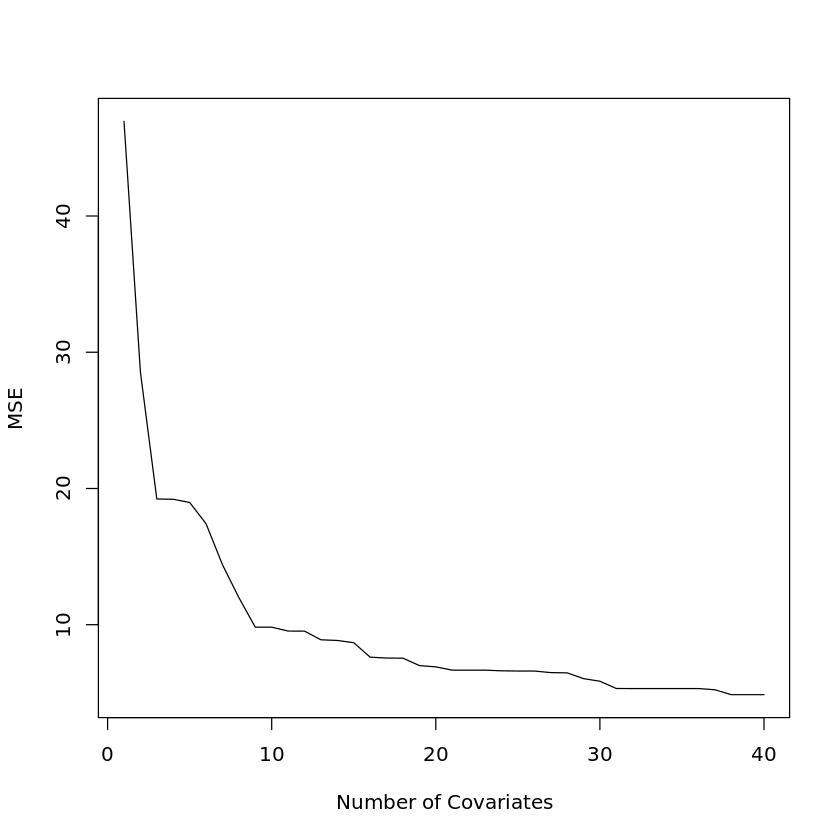

In [3]:
##################### Plot MSE in Training Sample ##################### 

plot(mse[,3],mse[,1], type = "n", ylab = "MSE", xlab = "Number of Covariates")
lines(mse[,3],mse[,1])

print(paste0("MSE for K = 1: ",mse[1,1]))
print(paste0("MSE for K = 10: ",mse[10,1]))
print(paste0("MSE for K = 40: ",mse[40,1]))

## Scatterplot Predicted Prices in Training Sample

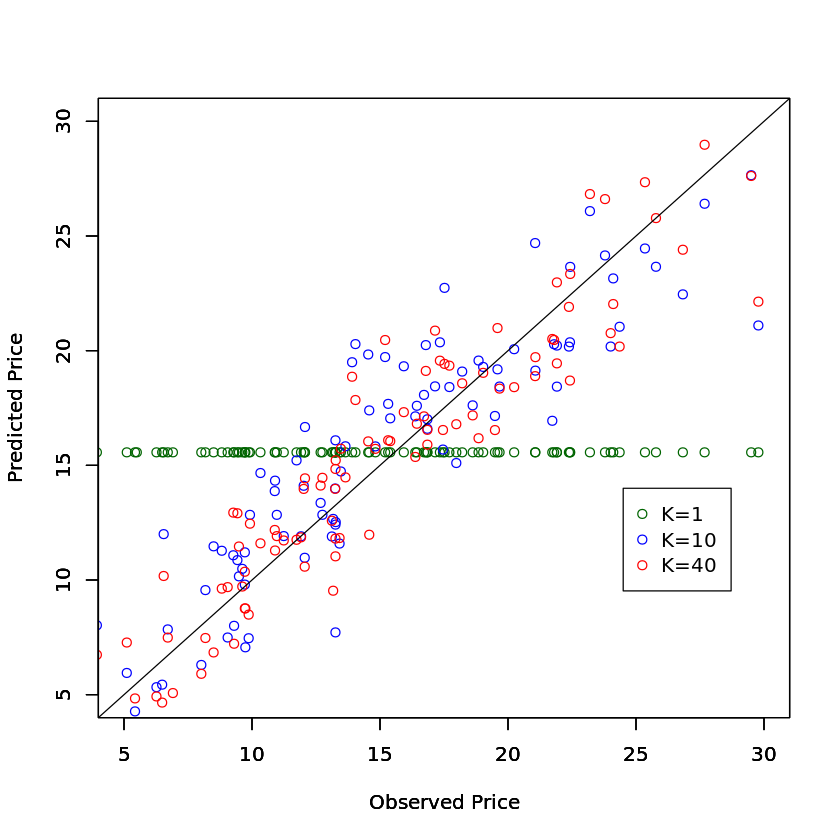

In [4]:
##################### Scatterplot Predicted Prices in Training Sample ##################### 

plot(first_price_train,y_hat_train[,1],xlim=c(5,30),ylim=c(5,30), col= "darkgreen", xlab = "Observed Price", ylab = "Predicted Price" )
par(new=TRUE)
plot(first_price_train,y_hat_train[,10],xlim=c(5,30),ylim=c(5,30), col= "blue", xlab = "Observed Price", ylab = "Predicted Price" )
par(new=TRUE)
plot(first_price_train,y_hat_train[,40],xlim=c(5,30),ylim=c(5,30), col= "red", xlab = "Observed Price", ylab = "Predicted Price" )
abline(a=0,b=1)
legend(24.5, 14, c("K=1", "K=10", "K=40"), col = c("darkgreen", "blue", "red"), pch = c(21, 21, 21))

## Plot MSE in Test Sample

[1] "MSE for K = 1: 45.742"
[1] "MSE for K = 10: 8.222"
[1] "MSE for K = 40: 46.499"


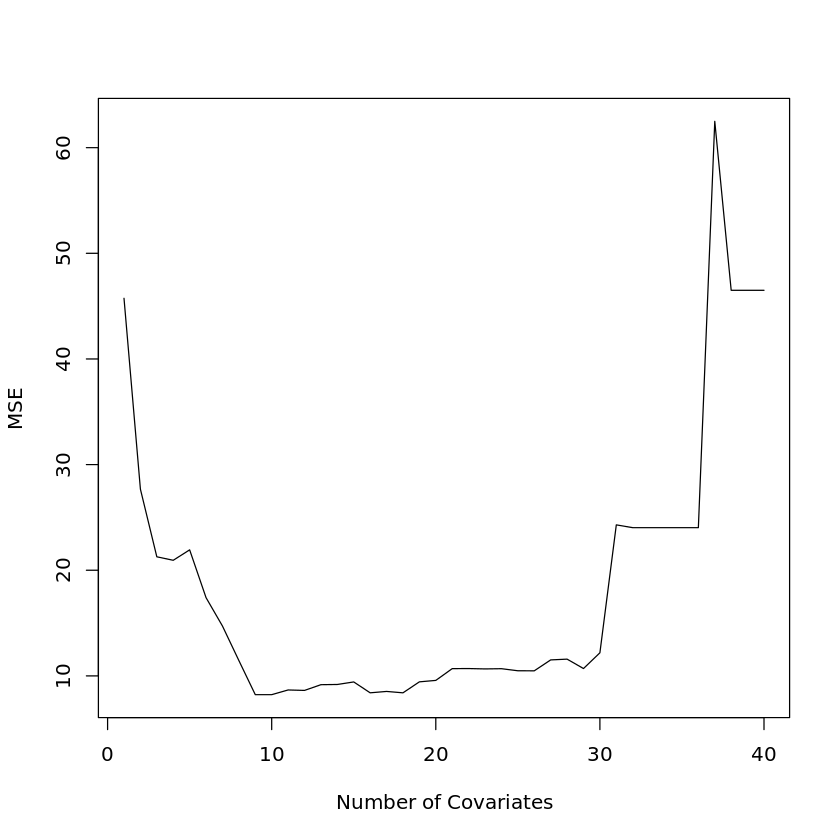

In [5]:
##################### Plot MSE in Test Sample ##################### 

plot(mse[,3],mse[,2], type = "n", ylab = "MSE", xlab = "Number of Covariates")
lines(mse[,3],mse[,2])

print(paste0("MSE for K = 1: ", round(mse[1,2], digits =3)))
print(paste0("MSE for K = 10: ", round(mse[10,2], digits =3)))
print(paste0("MSE for K = 40: ", round(mse[40,2], digits =3)))

## Scatterplot Predicted Prices in Test Sample

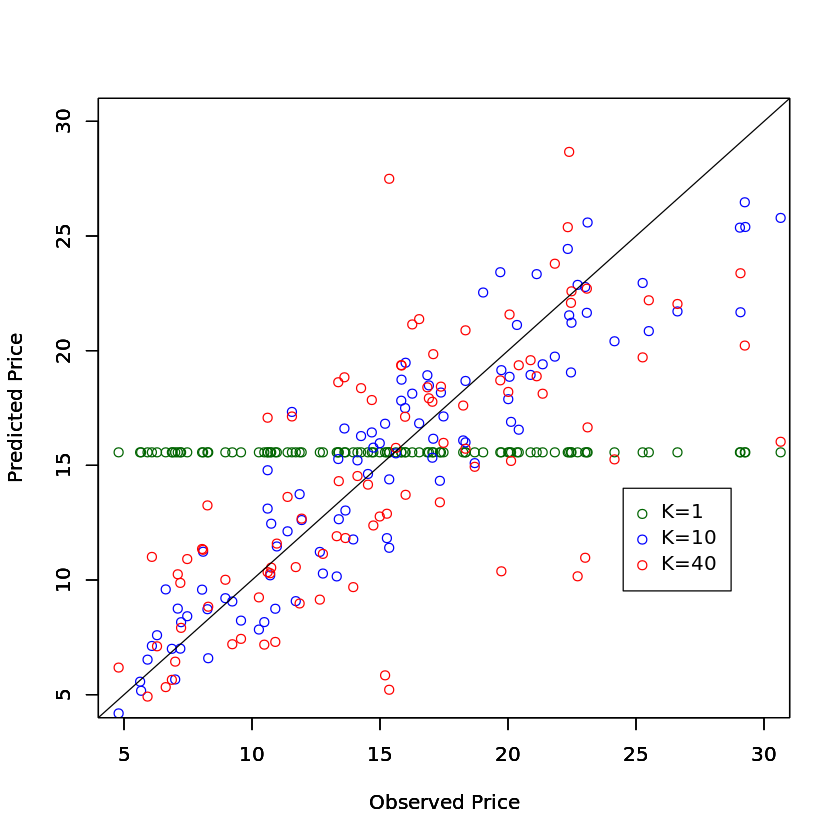

In [6]:
##################### Scatterplot Predicted Prices in Test Sample ##################### 

plot(first_price_test,y_hat_test[,1],xlim=c(5,30),ylim=c(5,30), col= "darkgreen", xlab = "Observed Price", ylab = "Predicted Price")
par(new=TRUE)
plot(first_price_test,y_hat_test[,10],xlim=c(5,30),ylim=c(5,30), col= "blue", xlab = "Observed Price", ylab = "Predicted Price")
par(new=TRUE)
plot(first_price_test,y_hat_test[,40],xlim=c(5,30),ylim=c(5,30), col= "red", xlab = "Observed Price", ylab = "Predicted Price")
abline(a=0,b=1)
legend(24.5, 14, c("K=1", "K=10", "K=40"), col = c("darkgreen", "blue", "red"), pch = c(21, 21, 21))

# Simulation of Bias-Variance Trade-Off

We load a large data set from *myLemons* with 104,721 observations and the same covariates as above. We take one observation to the test sample. We simulate the used car prices with the linear model
\begin{equation*}
price =  X\hat{\beta} + \epsilon,
\end{equation*}
where $\hat{\beta}$ is obtained from OLS estimates in the real data and $\epsilon \sim N(0,sd^2)$ (with $sd = 3$) adds artifical noise to the DGP. We subsample the data in $sub = 1500$ partitions.

For each subsample, we estimate an OLS model on the simulated price. We add covariates successively. We start with a model containing only a constant. The final model contains all observable covariates. We calulate the MSE, squared-bias, and variance accross all simulations,
\begin{equation*}
MSE = Var(\hat{Y}) + Bias(\hat{Y})^2 + Var(\epsilon).
\end{equation*}

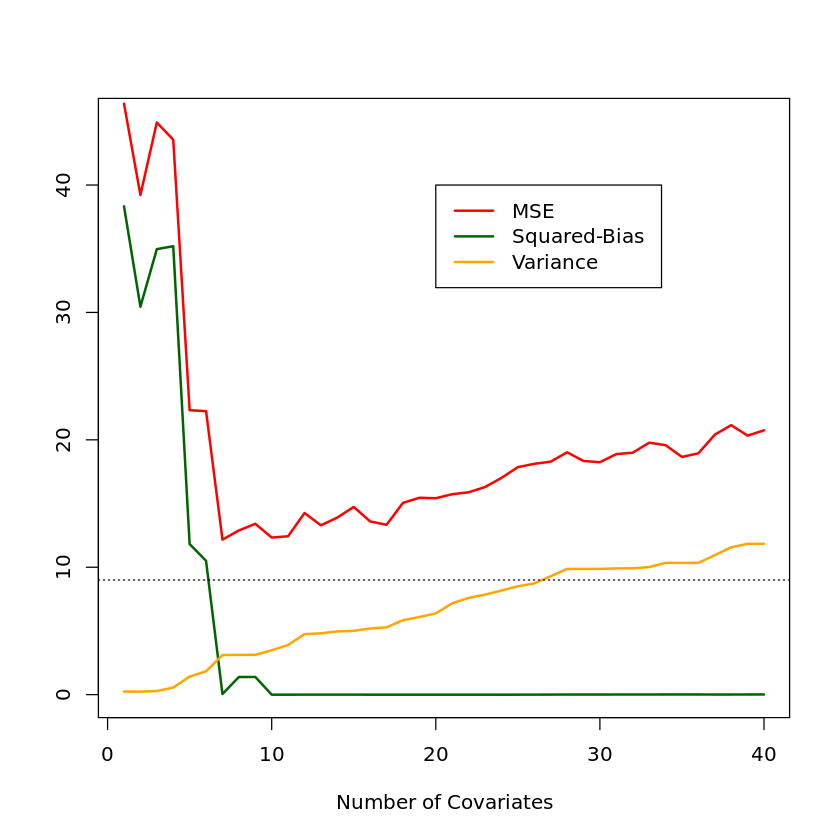

In [7]:
############################# Simulation of Bias-Variance Trade-Off ############################# 

# Set input parameters for the simulation
sub = 1500 # number of subamples
sd = 3 # irreducable noise

# Load data
data_raw <- read.csv("Data/mylemon.csv",header=TRUE, sep=",") # Load larger data set

# Set starting values for random number generator
set.seed(100001)

# Select training and test sample
df_train <- data_raw[-1,] # drops the first observation
df_test <- data_raw[1,] # contains only the first observation

# Define outcome and control variables
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))]))

# Simulate the Data Generating Process
u_tr <- matrix(rnorm(nrow(first_price_train),0,sd),nrow= nrow(first_price_train), ncol =1) # Irreducable noise
# Estimate the empirical coefficients
formular <- lm.fit(rbind(covariates_train[,c(1:10)],covariates_test[,c(1:10)]),rbind(first_price_train,first_price_test))
coef <- as.matrix(formular$coefficients)
coef[is.na(coef)] <- 0
# Simulate the price based on empricial coeffcents, observed covariates, and noise
y_new_train <- covariates_train[,c(1:10)] %*% coef  +u_tr 
y_0 <- covariates_test[,c(1:10)] %*% coef 
p <- as.matrix(ceiling(runif(nrow(df_train),0,sub))) # define sample partitions

# Estimate different OLS models on simulated price
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = sub)
y_hat_test <- matrix(NA, nrow = ncol(covariates_train), ncol = sub)
for (n in (1:sub)) { # iterate through replications of DGP
    for (c in (1:ncol(covariates_train))){ # iterate through OLS models with different number ofcovariates
        formular <- lm.fit(as.matrix(covariates_train[p==n,c(1:c)]),y_new_train[p==n,])
        y_hat_train <- formular$fitted.values
        coef <- as.matrix(formular$coefficients)
        coef[is.na(coef)] <- 0
        y_hat_test[c,n] <- covariates_test[,c(1:c)] %*% coef
        mse[c,n] <- mean((y_hat_test[c,n] - y_0 - rnorm(1,0,sd))^2)
    }
}

# Aggregate results accross all subsamples
test <- matrix(NA, nrow = ncol(covariates_train), ncol = 3)
for (c in (1:ncol(covariates_train))){
    test[c,1] <- var(y_hat_test[c,])
    test[c,2] <- (mean(y_hat_test[c,]) - y_0)^2
    test[c,3] <- mean(mse[c,]) 
}
test <- cbind(test,seq(1,nrow(test)))

# Plot Bias-Variance Trade-Off
plot(test[,4],test[,3], type = "n", ylab = "", xlab = "Number of Covariates", ylim = c(0,45))
lines(test[,4],test[,3], col = "red",lwd = 2)
par(new=TRUE)
lines(test[,4],test[,2], col = "darkgreen",lwd = 2)
par(new=TRUE)
lines(test[,4],test[,1], col = "orange",lwd = 2)
abline(h=sd^2,lty = 3)
legend(20, 40, c("MSE", "Squared-Bias", "Variance"), col = c("red", "darkgreen", "orange"), lty = c(1,1, 1),lwd = 2)

# *LASSO Examples*

## Prepare the Data with Fewer Covariates

In [8]:
# Load Packages
library("glmnet")
library("dplyr")

# Set starting values for random number generator
set.seed(10001)

# Load data
data_raw <- read.csv("Data/mylemon.csv",header=TRUE, sep=",") # Load data set


n_obs <- 100
data_use <- data_raw[,-c(1,3:5,13:37,40:41)] %>%
  dplyr::sample_n(n_obs)


# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_use))
training_set <- sample(seq_len(nrow(data_use)), size = size)

# Select training and test sample
df_train <- data_use[training_set,] # drops the first observation
df_test <- data_use[-training_set,] # contains only the first observation

# Define outcome and control variables
first_price_train <- as.matrix(df_train[,1])
first_price_test <- as.matrix(df_test[,1])
covariates_train <- as.matrix(df_train[,c(2:ncol(df_train))])
covariates_test <- as.matrix(df_test[,c(2:ncol(df_test))])

print('Data prepared.')

Loading required package: Matrix
Loaded glmnet 3.0-1


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "Data prepared."


## Estimate OLS Model

In [9]:
ols <- lm(first_price ~., data=df_train)
summary(ols)

# Calculate the MSE
predols_train <- predict(ols, newdata = df_train)
predols_test <- predict(ols, newdata = df_test)

R2_ols_train <- 1- mean((first_price_train - predols_train)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_ols_test <- 1- mean((first_price_test - predols_test)^2)/mean((first_price_test - mean(first_price_test))^2)

print(paste0("Training R-squared: ", round(R2_ols_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_ols_test, digits =3)))


Call:
lm(formula = first_price ~ ., data = df_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1317 -2.3952 -0.4502  2.2725  8.3970 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      21.24649    3.99314   5.321 4.24e-06 ***
diesel            2.07459    1.69501   1.224 0.228137    
other_car_owner   0.72972    0.95471   0.764 0.449155    
pm_green          1.63525    2.41303   0.678 0.501881    
private_seller    6.09999    2.41717   2.524 0.015691 *  
guarantee        -2.44042    2.06374  -1.183 0.243978    
inspection       -0.81303    1.17304  -0.693 0.492255    
maintenance_cert  1.48067    1.99847   0.741 0.463080    
mileage          -0.04877    0.02124  -2.296 0.026965 *  
age_car_years    -1.29137    0.32300  -3.998 0.000268 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.415 on 40 degrees of freedom
Multiple R-squared:  0.655,	Adjusted R-squared:  0.5773 
F-statistic: 8.436

[1] "Training R-squared: 0.655"
[1] "Test R-squared: 0.606"


## Lasso Model on Sample 1

In [10]:
set.seed(1001)

lasso.cv <- cv.glmnet(covariates_train, first_price_train, type.measure = "mse", nfolds = 10)
coef_lasso <- coef(lasso.cv, s = "lambda.min") # save for later comparison
print(coef_lasso)

# Calculate the MSE
predlasso_train <- predict(lasso.cv, newx = covariates_train, s = lasso.cv$lambda.min)
predlasso_test <- predict(lasso.cv, newx = covariates_test, s = lasso.cv$lambda.min)

R2_lasso_train <- 1- mean((first_price_train - predlasso_train)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_lasso_test <- 1- mean((first_price_test - predlasso_test)^2)/mean((first_price_test - mean(first_price_test))^2)

print(paste0("Training R-squared: ", round(R2_lasso_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_lasso_test, digits =3)))

10 x 1 sparse Matrix of class "dgCMatrix"
                           1
(Intercept)      22.77595058
diesel            .         
other_car_owner   .         
pm_green          .         
private_seller    0.07607656
guarantee        -0.43736119
inspection        .         
maintenance_cert  .         
mileage          -0.03077170
age_car_years    -1.01228717
[1] "Training R-squared: 0.543"
[1] "Test R-squared: 0.611"


## Lasso Model on Sample 2

In [11]:
# Set starting values for random number generator
set.seed(1299995)

n_obs <- 100

data_use <- data_raw[-training_set,-c(1,3:5,13:37,40:41)] %>%
  dplyr::sample_n(n_obs)

# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_use))
training_set <- sample(seq_len(nrow(data_use)), size = size)

# Select training and test sample
df_train <- data_use[training_set,] # drops the first observation


# Define outcome and control variables
first_price_train <- as.matrix(df_train[,1])
covariates_train <- as.matrix(df_train[,c(2:ncol(df_train))])

lasso.cv <- cv.glmnet(covariates_train, first_price_train, type.measure = "mse", nfolds = 10)
coef_lasso_1 <- coef(lasso.cv, s = "lambda.min") # save for later comparison

# Calculate the MSE
predlasso_train_1 <- predict(lasso.cv, newx = covariates_train, s = lasso.cv$lambda.min)
predlasso_test_1 <- predict(lasso.cv, newx = covariates_test, s = lasso.cv$lambda.min)

R2_lasso_train <- 1- mean((first_price_train - predlasso_train_1)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_lasso_test <- 1- mean((first_price_test - predlasso_test_1)^2)/mean((first_price_test - mean(first_price_test))^2)
print(paste0("Training R-squared: ", round(R2_lasso_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_lasso_test, digits =3)))

[1] "Training R-squared: 0.714"
[1] "Test R-squared: 0.569"


## Lasso Model on Sample 3

In [12]:
# Set starting values for random number generator
set.seed(1234564578)

n_obs <- 100

data_use <- data_raw[-training_set,-c(1,3:5,13:37,40:41)] %>%
  dplyr::sample_n(n_obs)

# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_use))
training_set <- sample(seq_len(nrow(data_use)), size = size)

# Select training and test sample
df_train <- data_use[training_set,] # drops the first observation

# Define outcome and control variables
first_price_train <- as.matrix(df_train[,1])
covariates_train <- as.matrix(df_train[,c(2:ncol(df_train))])

lasso.cv <- cv.glmnet(covariates_train, first_price_train, type.measure = "mse", nfolds = 10)
coef_lasso_2 <- coef(lasso.cv, s = "lambda.min") # save for later comparison

# Calculate the MSE
predlasso_train_2 <- predict(lasso.cv, newx = covariates_train, s = lasso.cv$lambda.min)
predlasso_test_2 <- predict(lasso.cv, newx = covariates_test, s = lasso.cv$lambda.min)

R2_lasso_train <- 1- mean((first_price_train - predlasso_train_2)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_lasso_test <- 1- mean((first_price_test - predlasso_test_2)^2)/mean((first_price_test - mean(first_price_test))^2)
print(paste0("Training R-squared: ", round(R2_lasso_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_lasso_test, digits =3)))

[1] "Training R-squared: 0.692"
[1] "Test R-squared: 0.363"


## Lasso Model on Sample 4

In [13]:
# Set starting values for random number generator
set.seed(15678)

n_obs <- 100

data_use <- data_raw[-training_set,-c(1,3:5,13:37,40:41)] %>%
  dplyr::sample_n(n_obs)


# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_use))
training_set <- sample(seq_len(nrow(data_use)), size = size)

# Select training and test sample
df_train <- data_use[training_set,] # drops the first observation

# Define outcome and control variables
first_price_train <- as.matrix(df_train[,1])
covariates_train <- as.matrix(df_train[,c(2:ncol(df_train))])

lasso.cv <- cv.glmnet(covariates_train, first_price_train, type.measure = "mse", nfolds = 10)
coef_lasso_3 <- coef(lasso.cv, s = "lambda.min") # save for later comparison

# Calculate the MSE
predlasso_train_3 <- predict(lasso.cv, newx = covariates_train, s = lasso.cv$lambda.min)
predlasso_test_3 <- predict(lasso.cv, newx = covariates_test, s = lasso.cv$lambda.min)

R2_lasso_train <- 1- mean((first_price_train - predlasso_train_3)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_lasso_test <- 1- mean((first_price_test - predlasso_test_3)^2)/mean((first_price_test - mean(first_price_test))^2)
print(paste0("Training R-squared: ", round(R2_lasso_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_lasso_test, digits =3)))

[1] "Training R-squared: 0.634"
[1] "Test R-squared: 0.595"


## Lasso Model on Sample 5

In [14]:
# Set starting values for random number generator
set.seed(12345678)

n_obs <- 100

data_use <- data_raw[-training_set,-c(1,3:5,13:37,40:41)] %>%
  dplyr::sample_n(n_obs)

# Generate variable with the rows in training data
size <- floor(0.5 * nrow(data_use))
training_set <- sample(seq_len(nrow(data_use)), size = size)

# Select training and test sample
df_train <- data_use[training_set,] # drops the first observation

# Define outcome and control variables
first_price_train <- as.matrix(df_train[,1])
covariates_train <- as.matrix(df_train[,c(2:ncol(df_train))])

lasso.cv <- cv.glmnet(covariates_train, first_price_train, type.measure = "mse", nfolds = 10)
coef_lasso_4 <- coef(lasso.cv, s = "lambda.min") # save for later comparison

# Calculate the MSE
predlasso_train_4 <- predict(lasso.cv, newx = covariates_train, s = lasso.cv$lambda.min)
predlasso_test_4 <- predict(lasso.cv, newx = covariates_test, s = lasso.cv$lambda.min)

R2_lasso_train <- 1- mean((first_price_train - predlasso_train_4)^2)/mean((first_price_train - mean(first_price_train))^2)
R2_lasso_test <- 1- mean((first_price_test - predlasso_test_4)^2)/mean((first_price_test - mean(first_price_test))^2)
print(paste0("Training R-squared: ", round(R2_lasso_train, digits =3)))
print(paste0("Test R-squared: ", round(R2_lasso_test, digits =3)))

[1] "Training R-squared: 0.649"
[1] "Test R-squared: 0.637"


## Plot Coefficients

In [15]:
print(cbind(coef_lasso,coef_lasso_1,coef_lasso_2,coef_lasso_3,coef_lasso_4))

10 x 5 sparse Matrix of class "dgCMatrix"
                           1           1           1           1           1
(Intercept)      22.77595058 25.94670943 24.93712041 27.30922402 25.11615819
diesel            .           .           2.38669532  .           0.88561889
other_car_owner   .          -1.25651280  0.39294853  .           .         
pm_green          .           2.87143287  .           .           .         
private_seller    0.07607656  5.09426912  .          -1.03654809  .         
guarantee        -0.43736119  1.67708911 15.93856351  .           .         
inspection        .          -0.66581206 -0.37443189  .           .         
maintenance_cert  .          -2.57929391 -0.86766548  .           .         
mileage          -0.03077170 -0.03674104 -0.04082223 -0.06867634 -0.06197067
age_car_years    -1.01228717 -1.34700566 -1.41559957 -0.87405094 -1.11453331


## Plot Correlation between Predicted Prices in Test Sample

In [16]:
print(cor(cbind(predlasso_test,predlasso_test_1,predlasso_test_2,predlasso_test_3,predlasso_test_4)))

          1         1         1         1         1
1 1.0000000 0.9449604 0.8503190 0.9706181 0.9892612
1 0.9449604 1.0000000 0.8139282 0.9109271 0.9361440
1 0.8503190 0.8139282 1.0000000 0.8535917 0.8707420
1 0.9706181 0.9109271 0.8535917 1.0000000 0.9921241
1 0.9892612 0.9361440 0.8707420 0.9921241 1.0000000
